In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
poly_order = 4
# Number of training samples
N = 10
# Generate equispaced floats in the interval [0, 2*pi]
x_train = np.linspace(0, 2*np.pi, N)
# Generate noise
mean = 0
std = 0.05
# Generate some numbers from the sine function
y = np.sin(x_train)
# Add noise
y += np.random.normal(mean, std, N)
#defining it as a matrix
y_train = np.asmatrix(y.reshape(N,1))

# adding the bias and higher order terms to x

In [84]:
x = np.append(np.ones((N,1)),x_train.reshape((N,1)),axis = 1)
for i in range(0,poly_order-1):
	x = np.append(x,(x_train.reshape((N,1)))**(i+2),axis = 1)
x = np.asmatrix(x)
print(x.shape)
print(x)

(10, 5)
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 6.98131701e-01 4.87387872e-01 3.40260924e-01
  2.37546937e-01]
 [1.00000000e+00 1.39626340e+00 1.94955149e+00 2.72208739e+00
  3.80075100e+00]
 [1.00000000e+00 2.09439510e+00 4.38649084e+00 9.18704494e+00
  1.92413019e+01]
 [1.00000000e+00 2.79252680e+00 7.79820595e+00 2.17766991e+01
  6.08120160e+01]
 [1.00000000e+00 3.49065850e+00 1.21846968e+01 4.25326155e+01
  1.48466836e+02]
 [1.00000000e+00 4.18879020e+00 1.75459634e+01 7.34963595e+01
  3.07860831e+02]
 [1.00000000e+00 4.88692191e+00 2.38820057e+01 1.16709497e+02
  5.70350197e+02]
 [1.00000000e+00 5.58505361e+00 3.11928238e+01 1.74213593e+02
  9.72992256e+02]
 [1.00000000e+00 6.28318531e+00 3.94784176e+01 2.48050213e+02
  1.55854546e+03]]


# finding the optimum weights

In [85]:
w = (x.T*x).I*x.T*y_train
print(w)

[[-4.40546409e-02]
 [ 1.70055240e+00]
 [-8.22556057e-01]
 [ 9.21370437e-02]
 [-5.83638469e-04]]


# generating test samples

In [86]:
M = 100
x_test = np.linspace(0, 2*np.pi, M)
x_t = np.asmatrix(np.append(np.ones((M,1)),x_test.reshape(M,1),axis = 1))
for i in range(0,poly_order-1):
	x_t = np.append(x_t,(x_test.reshape((M,1)))**(i+2),axis = 1)
x_t = np.asmatrix(x_t)
print(x.shape)

(10, 5)


# predicting the outputs for the test sample

In [87]:
y_test = x_t*w

# Error ( Cost)

In [88]:
y_fin = x * w

print("error:- ",np.asmatrix(y_train-y_fin).T*np.asmatrix(y_train-y_fin))

error:-  [[0.06597847]]


# ploting the results

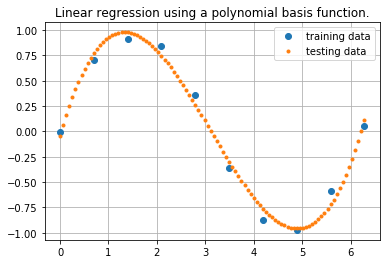

In [89]:
plt.plot(x_train,y_train,'o',label = 'training data')
plt.plot(x_test,y_test,'.',label = 'testing data')
plt.legend()
plt.grid()
plt.title("Linear regression using a polynomial basis function.")
plt.show()

# Observations

- Model is approximated by a polinomial function
- Noise is added to the training data labels

Polynomial order - Errors (10 training samples)
- 9  -> 6.63505983e-06
- 10 -> 11.34967298
- 4  -> 0.06597847

Clearly as the number of parameters crosses the number of training points, the model is performing very poorly